Recreate the morphological classification done by Choi et al. (2010) for all the galaxies in SDSS DR7.

In [1]:
from astropy.table import Table, vstack

import numpy as np

import matplotlib.pyplot as plt

# Import data

In [2]:
#galaxy_filename = '/Users/kellydouglass/Documents/Drexel/Research/Data/kias1033_5_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_correctVflag.txt'
galaxy_filename = '/Users/kellydouglass/Documents/Research/data/NSA_v1_0_1_VAGC.fits'

#galaxies = Table.read(galaxy_filename, format='ascii.commented_header')
galaxies = Table.read(galaxy_filename, format='fits')

# Late or Early type

Based on the classification by Park & Choi (2005)

#### Early types

In [67]:
early_boolean1 = np.logical_and(galaxies['u_r_KIAS'] > 1, galaxies['cd'] > 0.3)

early_boolean2_14p5_16 = np.logical_and.reduce((galaxies['u_r_KIAS'] > 1, 
                                                galaxies['u_r_KIAS'] <= 2.6, 
                                                galaxies['cd'] > -0.28125*galaxies['u_r_KIAS'] + 0.58125))
early_boolean2_16_17 = np.logical_and.reduce((galaxies['u_r_KIAS'] > 1,
                                              galaxies['u_r_KIAS'] <= 2.65,
                                              galaxies['cd'] > -0.290909*galaxies['u_r_KIAS'] + 0.590909))
early_boolean2_17_17p5 = np.logical_and.reduce((galaxies['u_r_KIAS'] > 1,
                                                galaxies['u_r_KIAS'] <= 2.7,
                                                galaxies['cd'] > -0.28236*galaxies['u_r_KIAS'] + 0.582353))

early_boolean3_14p5_16 = np.logical_and(galaxies['u_r_KIAS'] > 2.60, galaxies['cd'] > -0.15)
early_boolean3_16_16p5 = np.logical_and(galaxies['u_r_KIAS'] > 2.65, galaxies['cd'] > -0.18)
early_boolean3_16p5_17 = np.logical_and(galaxies['u_r_KIAS'] > 2.65, 
                                        galaxies['cd'] > -(0.07/0.85)*galaxies['u_r_KIAS'] + (-0.25 + (0.07*3.5/0.85)))
early_boolean3_17_17p5 = np.logical_and(galaxies['u_r_KIAS'] > 2.70, 
                                        galaxies['cd'] > -0.2125*galaxies['u_r_KIAS'] + 0.39375)

early_boolean_14p5_16_area = np.logical_or.reduce((early_boolean1, 
                                                   early_boolean2_14p5_16, 
                                                   early_boolean3_14p5_16))
early_boolean_16_16p5_area = np.logical_or.reduce((early_boolean1, 
                                                   early_boolean2_16_17, 
                                                   early_boolean3_16_16p5))
early_boolean_16p5_17_area = np.logical_or.reduce((early_boolean1, 
                                                   early_boolean2_16_17, 
                                                   early_boolean3_16p5_17))
early_boolean_17_17p5_area = np.logical_or.reduce((early_boolean1, 
                                                   early_boolean2_17_17p5, 
                                                   early_boolean3_17_17p5))

# Require early-type galaxies to have inverse concentration indices smaller than some value
early_boolean_14p5_16 = np.logical_and(early_boolean_14p5_16_area, galaxies['conx1'] < 0.43)
early_boolean_16_16p5 = np.logical_and(early_boolean_16_16p5_area, galaxies['conx1'] < 0.45)
early_boolean_16p5_17 = np.logical_and(early_boolean_16p5_17_area, galaxies['conx1'] < 0.47)
early_boolean_17_17p5 = np.logical_and(early_boolean_17_17p5_area, galaxies['conx1'] < 0.48)

#### Late types

In [68]:
late_boolean_14p5_16 = np.logical_not(early_boolean_14p5_16)
late_boolean_16_16p5 = np.logical_not(early_boolean_16_16p5)
late_boolean_16p5_17 = np.logical_not(early_boolean_16p5_17)
late_boolean_17_17p5 = np.logical_not(early_boolean_17_17p5)

#### Magnitude bins

In [69]:
boolean_14p5_16 = galaxies['prmag'] < 16
boolean_16_16p5 = np.logical_and(galaxies['prmag'] >= 16, galaxies['prmag'] < 16.5)
boolean_16p5_17 = np.logical_and(galaxies['prmag'] >= 16.5, galaxies['prmag'] < 17)
boolean_17_17p5 = galaxies['prmag'] >= 17

In [70]:
early_galaxies = vstack([galaxies[np.logical_and(boolean_14p5_16, early_boolean_14p5_16)], 
                         galaxies[np.logical_and(boolean_16_16p5, early_boolean_16_16p5)],
                         galaxies[np.logical_and(boolean_16p5_17, early_boolean_16p5_17)],
                         galaxies[np.logical_and(boolean_17_17p5, early_boolean_17_17p5)]])

late_galaxies = vstack([galaxies[np.logical_and(boolean_14p5_16, late_boolean_14p5_16)],
                        galaxies[np.logical_and(boolean_16_16p5, late_boolean_16_16p5)],
                        galaxies[np.logical_and(boolean_16p5_17, late_boolean_16p5_17)],
                        galaxies[np.logical_and(boolean_17_17p5, late_boolean_17_17p5)]])

In [71]:
early_boolean = np.logical_or.reduce([boolean_14p5_16 & early_boolean_14p5_16, 
                                      boolean_16_16p5 & early_boolean_16_16p5, 
                                      boolean_16p5_17 & early_boolean_16p5_17, 
                                      boolean_17_17p5 & early_boolean_17_17p5])

late_boolean = np.logical_or.reduce([boolean_14p5_16 & late_boolean_14p5_16, 
                                     boolean_16_16p5 & late_boolean_16_16p5, 
                                     boolean_16p5_17 & late_boolean_16p5_17, 
                                     boolean_17_17p5 & late_boolean_17_17p5])

# Morphological type

Based on the classification by Choi et al. (2010)

#### Normal late types

In [72]:
normal_late_boolean1 = np.logical_and.reduce((galaxies['u_r_KIAS'] > 1.8,
                                              galaxies['u_r_KIAS'] < 3.5,
                                              galaxies['cd'] > -0.7,
                                              galaxies['cd'] < 0.5))
normal_late_boolean2 = np.logical_and.reduce((galaxies['u_r_KIAS'] <= 1.8,
                                              galaxies['cd'] > -0.7,
                                              galaxies['cd'] < 1))

normal_late_boolean = np.logical_and(late_boolean, 
                                     np.logical_or(normal_late_boolean1, normal_late_boolean2))

#### Normal early types

In [73]:
normal_early_boolean = np.logical_and.reduce((galaxies['u_r_KIAS'] > 2.5,
                                              galaxies['u_r_KIAS'] < 3.5,
                                              galaxies['cd'] > -0.7, 
                                              galaxies['cd'] < 1))

normal_early_boolean = np.logical_and(normal_early_boolean, early_boolean)

#### Blue early types

In [74]:
blue_boolean = np.logical_and.reduce((galaxies['u_r_KIAS'] < 2.5,
                                      galaxies['cd'] > -0.7,
                                      galaxies['cd'] < 1))

blue_early_boolean = np.logical_and(blue_boolean, early_boolean)

#### Others

In [75]:
other_boolean = np.logical_and.reduce((galaxies['u_r_KIAS'] > 3.5,
                                       galaxies['cd'] > -0.7,
                                       galaxies['cd'] < 0.5))

In [76]:
normal_late_galaxies = galaxies[normal_late_boolean]
normal_early_galaxies = galaxies[normal_early_boolean]
blue_early_galaxies = galaxies[blue_early_boolean]
other_galaxies = galaxies[other_boolean]

# Plotting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


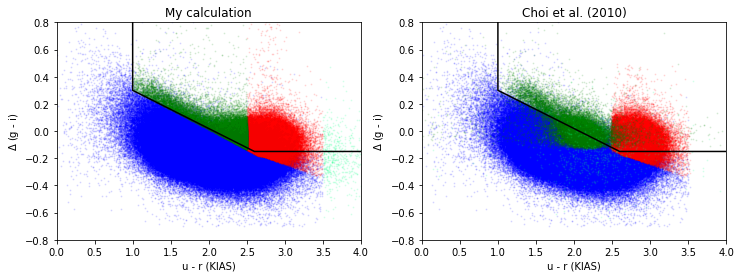

In [77]:
plt.figure(figsize=(12,4))

plt.subplot(121)

plt.scatter(normal_late_galaxies['u_r_KIAS'], normal_late_galaxies['cd'], s=1, c='b', alpha=0.1)
plt.scatter(normal_early_galaxies['u_r_KIAS'], normal_early_galaxies['cd'], s=1, c='r', alpha=0.1)
plt.scatter(blue_early_galaxies['u_r_KIAS'], blue_early_galaxies['cd'], s=1, c='g', alpha=0.1)
plt.scatter(other_galaxies['u_r_KIAS'], other_galaxies['cd'], s=1, c=(0,1,0.5,0.1))

plt.plot([1,1,2.6,4], [0.8,0.3,-0.15,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation')


plt.subplot(122)

plt.scatter(galaxies['u_r_KIAS'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                        galaxies['aimc']!=1, 
                                                        galaxies['aimc']!=2))],
            galaxies['cd'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                  galaxies['aimc']!=1, 
                                                  galaxies['aimc']!=2))],
            s=1, 
            c='b',
            #c=galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, 
            #                                           galaxies['aimc']!=1, 
            #                                           galaxies['aimc']!=2))], 
            alpha=0.1)
plt.scatter(galaxies['u_r_KIAS'][galaxies['aimc']==1], 
            galaxies['cd'][galaxies['aimc']==1], 
            s=1, 
            #c=galaxies['NUV_r'][galaxies['aimc']==1],
            c='r',
            alpha=0.1)
#plt.colorbar(label='NUV - r')
#plt.clim((1,8))
plt.scatter(galaxies['u_r'][galaxies['aimc']==2], 
            galaxies['cd'][galaxies['aimc']==2],
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(galaxies['u_r'][galaxies['aimc']==-1], 
            galaxies['cd'][galaxies['aimc']==-1],
            s=1, 
            c=(0,1,0.5,0.1))

plt.plot([1,1,2.6,4], [0.8,0.3,-0.15,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi et al. (2010)');

Choi et al. (2010) performed visual inspection of all the galaxies in the "trouble zones" of this diagram.  There are a decent number of late-types that have been reclassified as early-types along the boundary between the two, especially in the blue early-type region.

There are also a significant number of would-be blue early-type galaxies that do not have any morphological classification by Choi et al. (2010).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


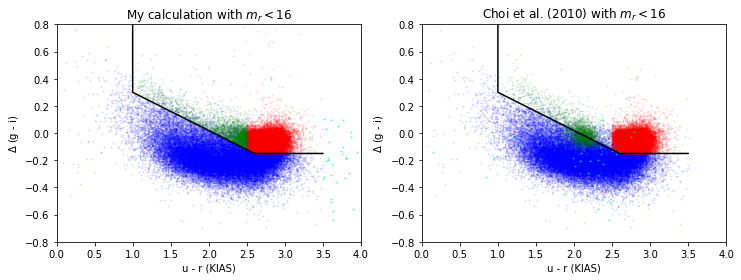

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(121)

plt.scatter(normal_late_galaxies['u_r_KIAS'][normal_late_galaxies['prmag'] < 16], 
            normal_late_galaxies['cd'][normal_late_galaxies['prmag'] < 16], 
            s=1, 
            c='b', 
            alpha=0.1)
plt.scatter(normal_early_galaxies['u_r_KIAS'][normal_early_galaxies['prmag'] < 16], 
            normal_early_galaxies['cd'][normal_early_galaxies['prmag'] < 16], 
            s=1, 
            c='r', 
            alpha=0.1)
plt.scatter(blue_early_galaxies['u_r_KIAS'][blue_early_galaxies['prmag'] < 16], 
            blue_early_galaxies['cd'][blue_early_galaxies['prmag'] < 16], 
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(other_galaxies['u_r_KIAS'][other_galaxies['prmag'] < 16], 
            other_galaxies['cd'][other_galaxies['prmag'] < 16], 
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.6,3.5], [0.8,0.3,-0.15,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation with $m_r < 16$')


plt.subplot(122)

plt.scatter(galaxies['u_r_KIAS'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                        galaxies['aimc']!=1, 
                                                        galaxies['aimc']!=2, 
                                                        boolean_14p5_16))],
            galaxies['cd'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                  galaxies['aimc']!=1, 
                                                  galaxies['aimc']!=2, 
                                                  boolean_14p5_16))],
            s=1, 
            c='b',
            #c=galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, 
            #                                           galaxies['aimc']!=1, 
            #                                           galaxies['aimc']!=2))], 
            alpha=0.1)
plt.scatter(galaxies['u_r_KIAS'][(galaxies['aimc']==1) & boolean_14p5_16], 
            galaxies['cd'][(galaxies['aimc']==1) & boolean_14p5_16], 
            s=1, 
            #c=galaxies['NUV_r'][galaxies['aimc']==1],
            c='r',
            alpha=0.1)
#plt.colorbar(label='NUV - r')
#plt.clim((1,8))
plt.scatter(galaxies['u_r'][(galaxies['aimc']==2) & boolean_14p5_16], 
            galaxies['cd'][(galaxies['aimc']==2) & boolean_14p5_16],
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(galaxies['u_r'][(galaxies['aimc']==-1) & boolean_14p5_16], 
            galaxies['cd'][(galaxies['aimc']==-1) & boolean_14p5_16],
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.6,3.5], [0.8,0.3,-0.15,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi et al. (2010) with $m_r < 16$');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


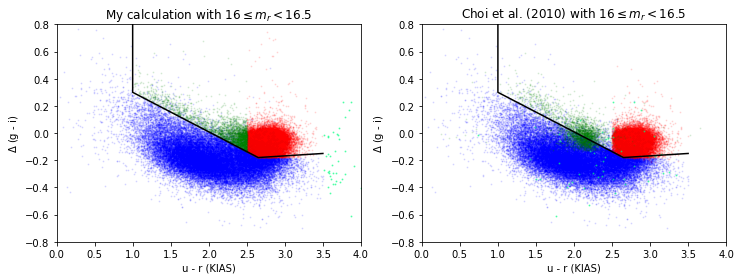

In [79]:
plt.figure(figsize=(12,4))

plt.subplot(121)

plt.scatter(normal_late_galaxies['u_r_KIAS'][(normal_late_galaxies['prmag'] >= 16) & (normal_late_galaxies['prmag'] < 16.5)], 
            normal_late_galaxies['cd'][(normal_late_galaxies['prmag'] >= 16) & (normal_late_galaxies['prmag'] < 16.5)], 
            s=1, 
            c='b', 
            alpha=0.1)
plt.scatter(normal_early_galaxies['u_r_KIAS'][(normal_early_galaxies['prmag'] >= 16) & (normal_early_galaxies['prmag'] < 16.5)], 
            normal_early_galaxies['cd'][(normal_early_galaxies['prmag'] >= 16) & (normal_early_galaxies['prmag'] < 16.5)], 
            s=1, 
            c='r', 
            alpha=0.1)
plt.scatter(blue_early_galaxies['u_r_KIAS'][(blue_early_galaxies['prmag'] >= 16) & (blue_early_galaxies['prmag'] < 16.5)], 
            blue_early_galaxies['cd'][(blue_early_galaxies['prmag'] >= 16) & (blue_early_galaxies['prmag'] < 16.5)], 
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(other_galaxies['u_r_KIAS'][(other_galaxies['prmag'] >= 16) & (other_galaxies['prmag'] < 16.5)], 
            other_galaxies['cd'][(other_galaxies['prmag'] >= 16) & (other_galaxies['prmag'] < 16.5)], 
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.65,3.5], [0.8,0.3,-0.18,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation with $16 \leq m_r < 16.5$')


plt.subplot(122)

plt.scatter(galaxies['u_r_KIAS'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                        galaxies['aimc']!=1, 
                                                        galaxies['aimc']!=2, 
                                                        boolean_16_16p5))],
            galaxies['cd'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                  galaxies['aimc']!=1, 
                                                  galaxies['aimc']!=2, 
                                                  boolean_16_16p5))],
            s=1, 
            c='b',
            #c=galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, 
            #                                           galaxies['aimc']!=1, 
            #                                           galaxies['aimc']!=2))], 
            alpha=0.1)
plt.scatter(galaxies['u_r_KIAS'][(galaxies['aimc']==1) & boolean_16_16p5], 
            galaxies['cd'][(galaxies['aimc']==1) & boolean_16_16p5], 
            s=1, 
            #c=galaxies['NUV_r'][galaxies['aimc']==1],
            c='r',
            alpha=0.1)
#plt.colorbar(label='NUV - r')
#plt.clim((1,8))
plt.scatter(galaxies['u_r'][(galaxies['aimc']==2) & boolean_16_16p5], 
            galaxies['cd'][(galaxies['aimc']==2) & boolean_16_16p5],
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(galaxies['u_r'][(galaxies['aimc']==-1) & boolean_16_16p5], 
            galaxies['cd'][(galaxies['aimc']==-1) & boolean_16_16p5],
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.65,3.5], [0.8,0.3,-0.18,-0.15], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi et al. (2010) with $16 \leq m_r < 16.5$');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


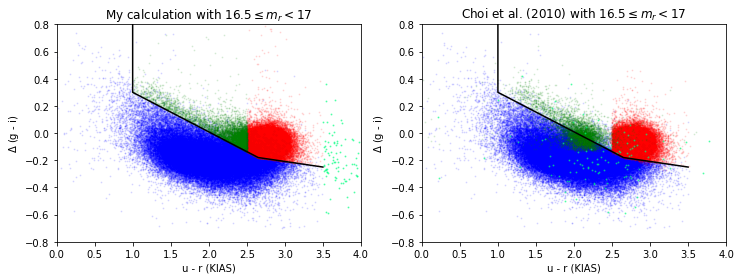

In [80]:
plt.figure(figsize=(12,4))

plt.subplot(121)

plt.scatter(normal_late_galaxies['u_r_KIAS'][(normal_late_galaxies['prmag'] >= 16.5) & (normal_late_galaxies['prmag'] < 17)], 
            normal_late_galaxies['cd'][(normal_late_galaxies['prmag'] >= 16.5) & (normal_late_galaxies['prmag'] < 17)], 
            s=1, 
            c='b', 
            alpha=0.1)
plt.scatter(normal_early_galaxies['u_r_KIAS'][(normal_early_galaxies['prmag'] >= 16.5) & (normal_early_galaxies['prmag'] < 17)], 
            normal_early_galaxies['cd'][(normal_early_galaxies['prmag'] >= 16.5) & (normal_early_galaxies['prmag'] < 17)], 
            s=1, 
            c='r', 
            alpha=0.1)
plt.scatter(blue_early_galaxies['u_r_KIAS'][(blue_early_galaxies['prmag'] >= 16.5) & (blue_early_galaxies['prmag'] < 17)], 
            blue_early_galaxies['cd'][(blue_early_galaxies['prmag'] >= 16.5) & (blue_early_galaxies['prmag'] < 17)], 
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(other_galaxies['u_r_KIAS'][(other_galaxies['prmag'] >= 16.5) & (other_galaxies['prmag'] < 17)], 
            other_galaxies['cd'][(other_galaxies['prmag'] >= 16.5) & (other_galaxies['prmag'] < 17)], 
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.65,3.5], [0.8,0.3,-0.18,-0.25], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation with $16.5 \leq m_r < 17$')


plt.subplot(122)

plt.scatter(galaxies['u_r_KIAS'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                        galaxies['aimc']!=1, 
                                                        galaxies['aimc']!=2, 
                                                        boolean_16p5_17))],
            galaxies['cd'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                  galaxies['aimc']!=1, 
                                                  galaxies['aimc']!=2, 
                                                  boolean_16p5_17))],
            s=1, 
            c='b',
            #c=galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, 
            #                                           galaxies['aimc']!=1, 
            #                                           galaxies['aimc']!=2))], 
            alpha=0.1)
plt.scatter(galaxies['u_r_KIAS'][(galaxies['aimc']==1) & boolean_16p5_17], 
            galaxies['cd'][(galaxies['aimc']==1) & boolean_16p5_17], 
            s=1, 
            #c=galaxies['NUV_r'][galaxies['aimc']==1],
            c='r',
            alpha=0.1)
#plt.colorbar(label='NUV - r')
#plt.clim((1,8))
plt.scatter(galaxies['u_r'][(galaxies['aimc']==2) & boolean_16p5_17], 
            galaxies['cd'][(galaxies['aimc']==2) & boolean_16p5_17],
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(galaxies['u_r'][(galaxies['aimc']==-1) & boolean_16p5_17], 
            galaxies['cd'][(galaxies['aimc']==-1) & boolean_16p5_17],
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.65,3.5], [0.8,0.3,-0.18,-0.25], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi et al. (2010) with $16.5 \leq m_r < 17$');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


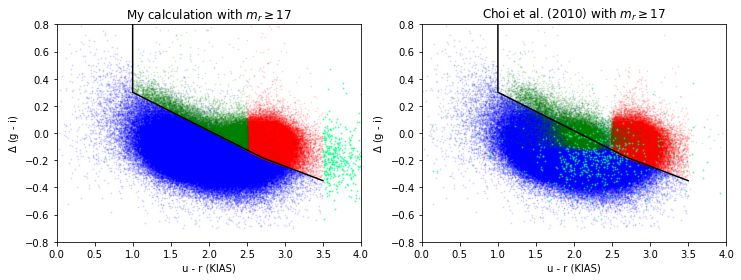

In [81]:
plt.figure(figsize=(12,4))

plt.subplot(121)

plt.scatter(normal_late_galaxies['u_r_KIAS'][normal_late_galaxies['prmag'] >= 17], 
            normal_late_galaxies['cd'][normal_late_galaxies['prmag'] >= 17], 
            s=1, 
            c='b', 
            alpha=0.1)
plt.scatter(normal_early_galaxies['u_r_KIAS'][normal_early_galaxies['prmag'] >= 17], 
            normal_early_galaxies['cd'][normal_early_galaxies['prmag'] >= 17], 
            s=1, 
            c='r', 
            alpha=0.1)
plt.scatter(blue_early_galaxies['u_r_KIAS'][blue_early_galaxies['prmag'] >= 17], 
            blue_early_galaxies['cd'][blue_early_galaxies['prmag'] >= 17], 
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(other_galaxies['u_r_KIAS'][other_galaxies['prmag'] >= 17], 
            other_galaxies['cd'][other_galaxies['prmag'] >= 17], 
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.7,3.5], [0.8,0.3,-0.18,-0.35], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('My calculation with $m_r \geq 17$')


plt.subplot(122)

plt.scatter(galaxies['u_r_KIAS'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                        galaxies['aimc']!=1, 
                                                        galaxies['aimc']!=2, 
                                                        boolean_17_17p5))],
            galaxies['cd'][np.logical_and.reduce((galaxies['aimc']>0, 
                                                  galaxies['aimc']!=1, 
                                                  galaxies['aimc']!=2, 
                                                  boolean_17_17p5))],
            s=1, 
            c='b',
            #c=galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, 
            #                                           galaxies['aimc']!=1, 
            #                                           galaxies['aimc']!=2))], 
            alpha=0.1)
plt.scatter(galaxies['u_r_KIAS'][(galaxies['aimc']==1) & boolean_17_17p5], 
            galaxies['cd'][(galaxies['aimc']==1) & boolean_17_17p5], 
            s=1, 
            #c=galaxies['NUV_r'][galaxies['aimc']==1],
            c='r',
            alpha=0.1)
#plt.colorbar(label='NUV - r')
#plt.clim((1,8))
plt.scatter(galaxies['u_r'][(galaxies['aimc']==2) & boolean_17_17p5], 
            galaxies['cd'][(galaxies['aimc']==2) & boolean_17_17p5],
            s=1, 
            c='g', 
            alpha=0.1)
plt.scatter(galaxies['u_r'][(galaxies['aimc']==-1) & boolean_17_17p5], 
            galaxies['cd'][(galaxies['aimc']==-1) & boolean_17_17p5],
            s=1, 
            c=(0,1,0.5,0.5))

plt.plot([1,1,2.7,3.5], [0.8,0.3,-0.18,-0.35], 'k')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)')
plt.title('Choi et al. (2010) with $m_r \geq 17$');

## Color distribution

In [82]:
ur_bins = np.arange(0,4,0.02)
NUVr_bins = np.arange(0,10,0.1)

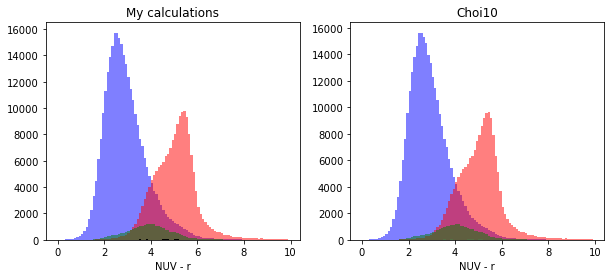

In [83]:
plt.figure(figsize=(10,4))


plt.subplot(121)

plt.hist(normal_late_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='b')
plt.hist(normal_early_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='r')
plt.hist(blue_early_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='g')
plt.hist(other_galaxies['NUV_r'], bins=NUVr_bins, facecolor='k')

plt.xlabel('NUV - r')
plt.title('My calculations')


plt.subplot(122)

plt.hist(galaxies['NUV_r'][np.logical_and.reduce((galaxies['aimc']>0, galaxies['aimc']!=1, galaxies['aimc']!=2))],
         bins=NUVr_bins, alpha=0.5, facecolor='b')
plt.hist(galaxies['NUV_r'][galaxies['aimc']==1], bins=NUVr_bins, alpha=0.5, facecolor='r')
plt.hist(galaxies['NUV_r'][galaxies['aimc']==2], bins=NUVr_bins, alpha=0.5, facecolor='g')
plt.hist(galaxies['NUV_r'][galaxies['aimc']==-1], bins=NUVr_bins, facecolor=(0,1,0.5,0.1))

plt.xlabel('NUV - r')
plt.title('Choi10');

# Defining the Green Valley

Galaxies in the **GV** should include
- Blue early types
- Galaxies that would have been a normal early type except for their $c_{inv}$ value
- Late-type galaxies that fall below the last arm of the classification field

This means that galaxies in the **BC** are:
- Normal late types EXCEPT those that would have been a normal early type except that $c_{inv} \geq 0.43$

And galaxies in the **RS** are:
- Normal early types
- The "other" galaxies

In [84]:
green_boolean = np.logical_or.reduce((np.logical_and.reduce((early_boolean_14p5_16_area, 
                                                             galaxies['conx1'] >= 0.43,
                                                             boolean_14p5_16)), 
                                      np.logical_and.reduce((early_boolean_16_16p5_area,
                                                             galaxies['conx1'] >= 0.45,
                                                             boolean_16_16p5)),
                                      np.logical_and.reduce((early_boolean_16p5_17_area,
                                                             galaxies['conx1'] >= 0.47,
                                                             boolean_16p5_17)),
                                      np.logical_and.reduce((early_boolean_17_17p5_area,
                                                             galaxies['conx1'] >= 0.48,
                                                             boolean_17_17p5))))

blue_boolean = np.logical_and(late_boolean, late_boolean != green_boolean)

In [85]:
green_galaxies = vstack([blue_early_galaxies, galaxies[green_boolean]])

blue_galaxies = galaxies[blue_boolean]

red_galaxies = vstack([normal_early_galaxies, other_galaxies])

## Color distribution

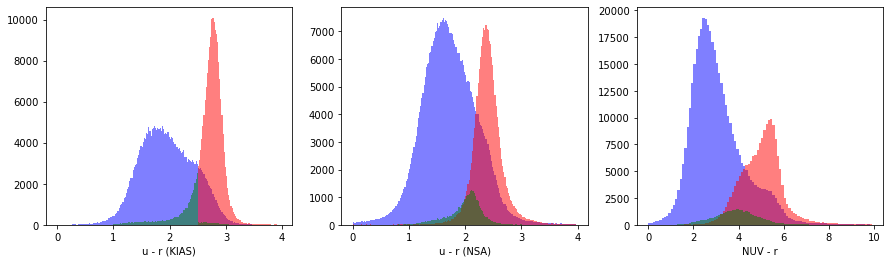

In [86]:
plt.figure(figsize=(15,4))


# u - r (KIAS)
plt.subplot(131)

plt.hist(blue_galaxies['u_r_KIAS'], bins=ur_bins, alpha=0.5, facecolor='b')
plt.hist(red_galaxies['u_r_KIAS'], bins=ur_bins, alpha=0.5, facecolor='r')
plt.hist(green_galaxies['u_r_KIAS'], bins=ur_bins, alpha=0.5, facecolor='g')

plt.xlabel('u - r (KIAS)')


# u - r (NSA)
plt.subplot(132)

plt.hist(blue_galaxies['u_r'], bins=ur_bins, alpha=0.5, facecolor='b')
plt.hist(red_galaxies['u_r'], bins=ur_bins, alpha=0.5, facecolor='r')
plt.hist(green_galaxies['u_r'], bins=ur_bins, alpha=0.5, facecolor='g')

plt.xlabel('u - r (NSA)')


# NUV - r
plt.subplot(133)

plt.hist(blue_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='b')
plt.hist(red_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='r')
plt.hist(green_galaxies['NUV_r'], bins=NUVr_bins, alpha=0.5, facecolor='g')

plt.xlabel('NUV - r');

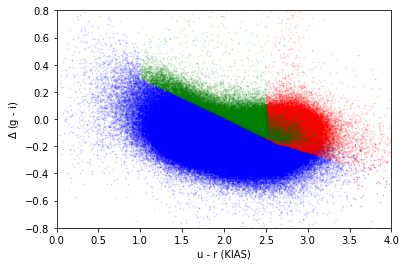

In [87]:
plt.figure()

plt.scatter(blue_galaxies['u_r_KIAS'], blue_galaxies['cd'], s=1, c='b', alpha=0.1)
plt.scatter(red_galaxies['u_r_KIAS'], red_galaxies['cd'], s=1, c='r', alpha=0.1)
plt.scatter(green_galaxies['u_r_KIAS'], green_galaxies['cd'], s=1, c='g', alpha=0.1)

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r (KIAS)')
plt.ylabel('$\Delta$ (g - i)');